In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.dates import DateFormatter
import pandas as pd

In [2]:
# lets read our data

df = pd.read_csv('https://ds.codeup.com/saas.csv')

In [3]:
# lets check the shape of the data

df.shape

(790458, 5)

In [4]:
# lets take a quick look at our data

df.head()

,Month_Invoiced,Customer_Id,Invoice_Id,Subscription_Type,Amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0
2,2014-01-31,1000002,5000002,0.0,0.0
3,2014-01-31,1000003,5000003,0.0,0.0
4,2014-01-31,1000004,5000004,1.0,5.0


In [5]:
# check if there are any nulls

df.isnull().sum()

Month_Invoiced       0
Customer_Id          0
Invoice_Id           0
Subscription_Type    0
Amount               0
dtype: int64

In [6]:
# check the datatypes

df.dtypes

Month_Invoiced        object
Customer_Id            int64
Invoice_Id             int64
Subscription_Type    float64
Amount               float64
dtype: object

In [10]:
# lets check the number of unique observations in each columns

df.nunique()

Month_Invoiced           48
Customer_Id           29400
Invoice_Id           790458
Subscription_Type         5
Amount                    5
dtype: int64

**Takeaways:**
- Invoice id is unique to each observations because its n-unique number matches the shape of the data. So, it is a unique identifier for each observation
- We have a datetime whihc is not stored in a correct format


In [11]:
# lets set some defaults for plotting

plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=13)
plt.style.use('bmh')

In [12]:
# Since, all of the columns are in upper case, lets lower them


df.columns = [col.lower() for col in df]

In [15]:
# lets properly store our datetime field

df.month_invoiced = pd.to_datetime(df.month_invoiced)

In [17]:
# lets convert the float subscription type and float amount to integers

df.amount = df.amount.astype(int)

df.subscription_type = df.subscription_type.astype(int)

In [19]:
# lets recheck the data types

df.dtypes

month_invoiced       datetime64[ns]
customer_id                   int64
invoice_id                    int64
subscription_type             int64
amount                        int64
dtype: object

In [20]:
# now lets set our datetime as index

df = df.set_index('month_invoiced').sort_index()

In [21]:
df

,customer_id,invoice_id,subscription_type,amount
month_invoiced,,,,
2014-01-31,1000000,5000000,0,0
2014-01-31,1000001,5000001,2,10
2014-01-31,1000002,5000002,0,0
2014-01-31,1000003,5000003,0,0
2014-01-31,1000004,5000004,1,5
...,...,...,...,...
2017-12-31,1029395,5790453,0,0
2017-12-31,1029396,5790454,0,0
2017-12-31,1029397,5790455,3,15


In [26]:
# lets check the range of which the data was collected

df.index.max(), df.index.min()

(Timestamp('2017-12-31 00:00:00'), Timestamp('2014-01-31 00:00:00'))

In [27]:
# lets check how many days worth of data we have


df.index.max() -  df.index.min()

Timedelta('1430 days 00:00:00')

In [29]:
df.subscription_type.value_counts()

0    496410
1    178212
2     70706
3     26474
4     18656
Name: subscription_type, dtype: int64

In [30]:
df.amount.value_counts()

0     496410
5     178212
10     70706
15     26474
20     18656
Name: amount, dtype: int64

In [31]:
# upon looking at these numbers, there seem to be some sort of relationship
# between the type of subscription and the amount. Lets check that out

pd.crosstab(df.subscription_type, df.amount)

amount,0,5,10,15,20
subscription_type,,,,,
0,496410,0,0,0,0
1,0,178212,0,0,0
2,0,0,70706,0,0
3,0,0,0,26474,0
4,0,0,0,0,18656


- Different subscription type means different amount paid

Text(0.5, 1.0, 'How many customers are there each month')

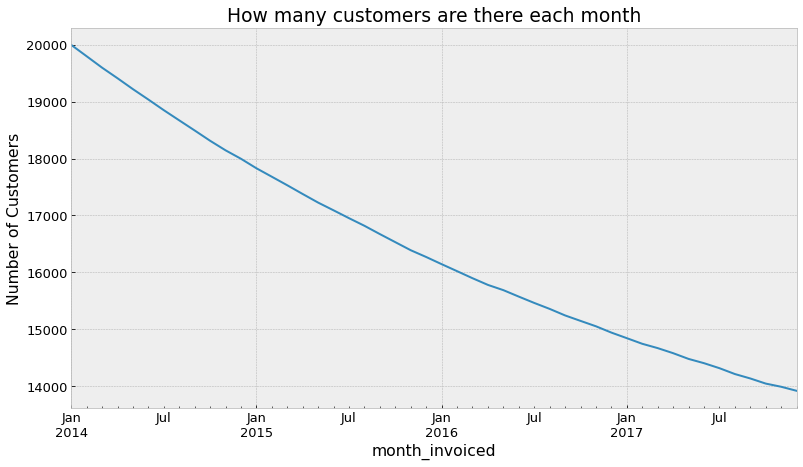

In [33]:
# lets check how many observations each month

df.resample('M').size().plot()
plt.ylabel('Number of Customers')
plt.title('How many customers are there each month')

**As the time goes on, the number of customers is decreasing. Are we loosing customers**

<AxesSubplot:xlabel='month_invoiced'>

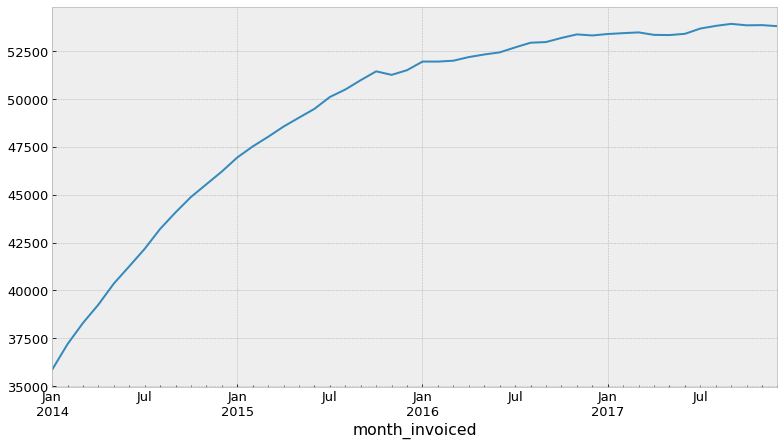

In [34]:
# if the monthly revenue is decreasing as well then we may be loosing customer
# so lets check that

df.resample('M').amount.sum().plot()

<AxesSubplot:xlabel='month_invoiced'>

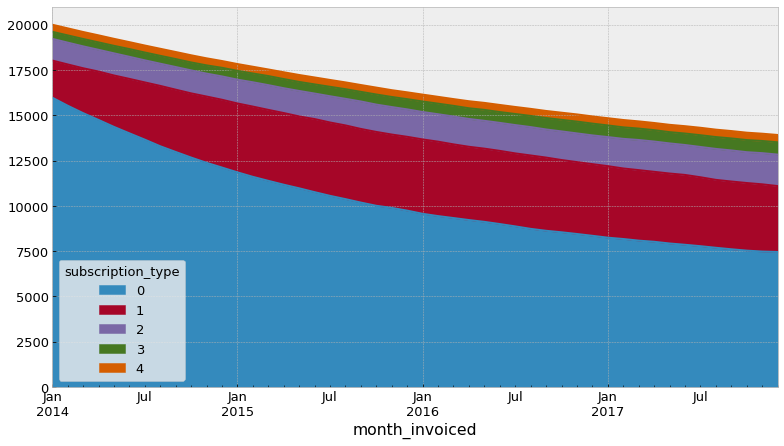

In [37]:
df.groupby('subscription_type').resample('M').size().T.plot.area()

<AxesSubplot:xlabel='month_invoiced'>

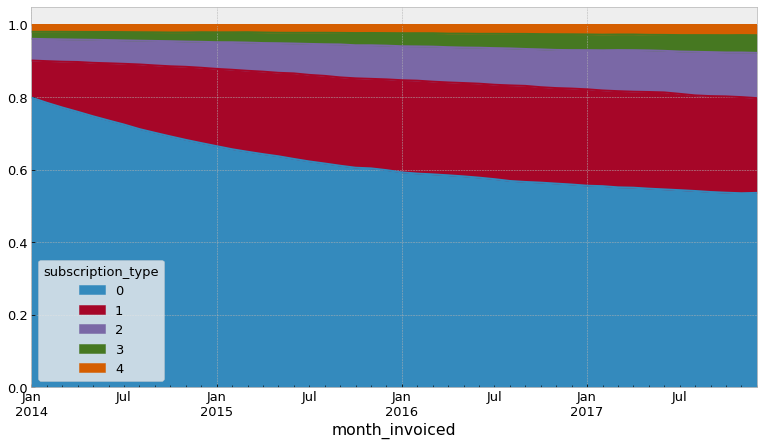

In [40]:
df.groupby('subscription_type').resample('M').size().T.apply(lambda row: row/row.sum(), axis = 1).plot.area()

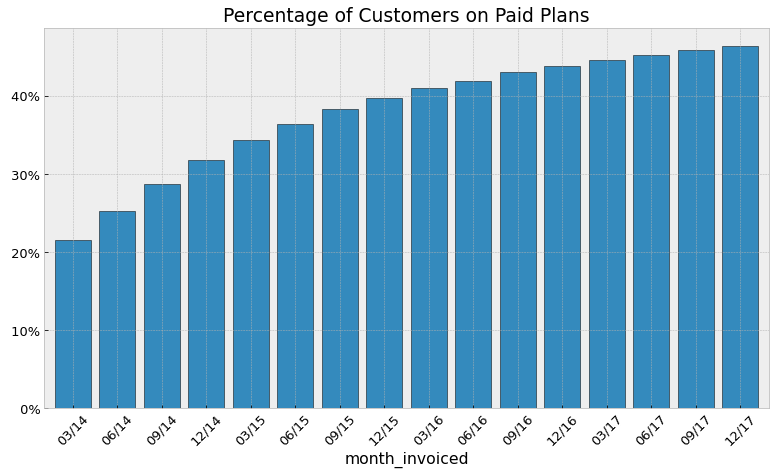

In [45]:
ax =(
      df.assign(
      paid_plan = lambda df: df.subscription_type.apply(lambda x: x>0) 
      ).resample('Q')
    .paid_plan.mean()
    .plot.bar(width = 0.8, ec = 'black')


)
labels = [pd.to_datetime(t.get_text()).strftime('%m/%y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation = 45)
ax.set(title = 'Percentage of Customers on Paid Plans')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x: .0%}'))

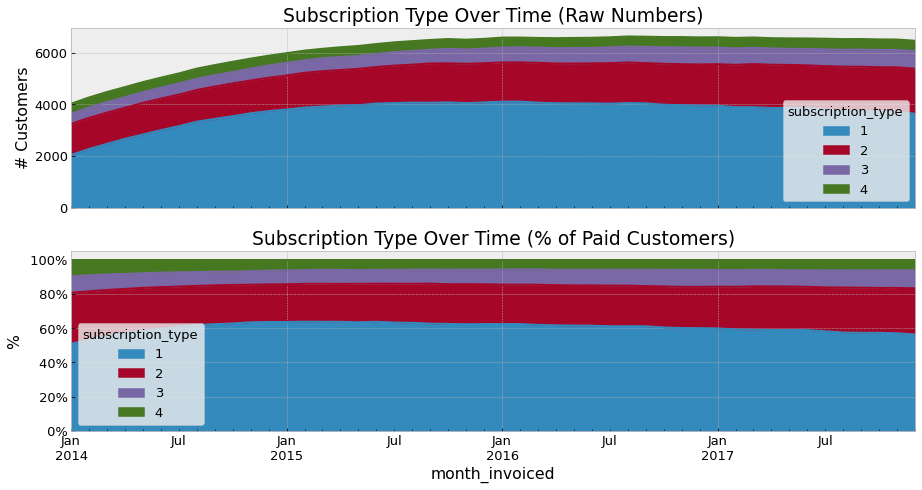

In [59]:
monthly_paid_plans = (
df.query('subscription_type > 0')
.groupby('subscription_type')
.resample('M')
.size().T)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)

monthly_paid_plans.plot.area(ax = ax1)
ax1.set(title='Subscription Type Over Time (Raw Numbers)', ylabel='# Customers')

monthly_paid_plans.apply(lambda row: row/row.sum(), axis = 1).plot.area(ax = ax2)

ax2.set(title = 'Subscription Type Over Time (% of Paid Customers)', ylabel = '%')
ax2.yaxis.set_major_formatter(StrMethodFormatter('{x: .0%}'))
fig.tight_layout()

In [49]:
monthly_paid_plans

subscription_type,1,2,3,4
month_invoiced,,,,
2014-01-31,2047,1199,387,391
2014-02-28,2276,1203,400,389
2014-03-31,2476,1209,407,386
2014-04-30,2669,1200,410,388
2014-05-31,2837,1222,414,387
2014-06-30,3004,1219,427,382
2014-07-31,3159,1219,431,386
2014-08-31,3331,1225,435,389
2014-09-30,3438,1250,439,390


In [54]:
df.query('subscription_type > 0').groupby('subscription_type').resample('M').size().T

subscription_type,1,2,3,4
month_invoiced,,,,
2014-01-31,2047,1199,387,391
2014-02-28,2276,1203,400,389
2014-03-31,2476,1209,407,386
2014-04-30,2669,1200,410,388
2014-05-31,2837,1222,414,387
2014-06-30,3004,1219,427,382
2014-07-31,3159,1219,431,386
2014-08-31,3331,1225,435,389
2014-09-30,3438,1250,439,390
